# Projet Empirical Finance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import scipy
T=1000
df = pd.read_excel('/Users/elyes/Desktop/DATA_HW2.xlsx',skiprows=1,index_col='Code')


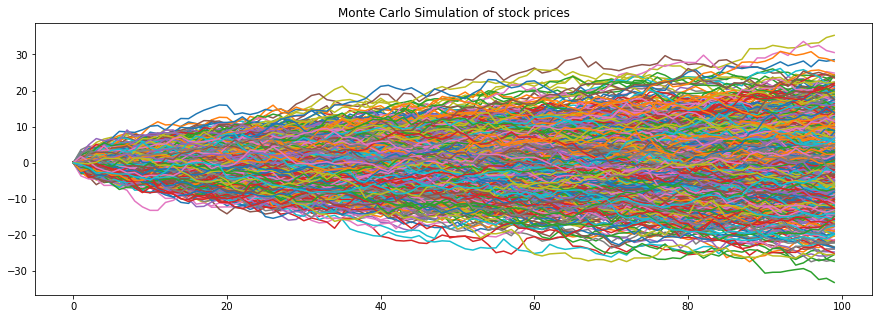

In [2]:
T=1000
np.random.seed(123)
N = 100
W = np.zeros(N+1)
W={}
for t in range(T):
    W[t] = np.cumsum(np.random.standard_normal(N))
W=pd.DataFrame(W)
W=W-W.iloc[0,:]
W.iloc[0,:]=0
fig = plt.figure(figsize=(15,5))
plt.plot(W)
plt.title('Monte Carlo Simulation of stock prices'.format(T))
plt.show()

In [3]:
F={}
import statsmodels.api as sm
from statsmodels.formula.api import ols
for t in range(T):
    Y=W[[t]].diff().dropna()
    X=(W[[t]].shift(1)).dropna()
    X.columns=['Ptminus']
    Y.columns=['Ptdifferencial']
    F[t]=Y.join(X)

             Betas
count  1000.000000
mean     -1.509259
std       0.880859
min      -4.130579
25%      -2.104996
50%      -1.541825
75%      -0.969770
max       2.660512


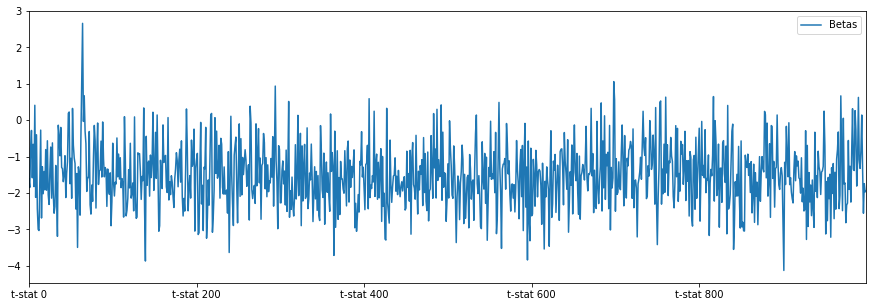

,Betas
t-stat 901,-4.130579
t-stat 139,-3.871780
t-stat 595,-3.842455
t-stat 364,-3.717468
t-stat 239,-3.637234
t-stat 841,-3.552363
t-stat 615,-3.541296
t-stat 564,-3.525120
t-stat 58,-3.497565
t-stat 621,-3.465710


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
tB={}
for t in range(T):
    formula='Ptdifferencial ~ Ptminus'
    results = ols(formula,F[t]).fit()
    tB['t-stat {}'.format(t)]=results.tvalues[1]
tB=pd.DataFrame(tB,index=['Betas'])
tB=tB.T
tB.plot(figsize=(15,5))
print(tB.describe())
plt.show()
tB=tB.sort_values('Betas',axis=0)
tB

In [5]:
Critical_values={}
a=0
b=0
c=0
for t in range(T):
    if (tB.iloc[0:t].count()/T)[0]>0.01 and a==0:
        Critical_values['1%'] =tB.iloc[t-2][0]
        a+=1
    elif (tB.iloc[0:t].count()/T)[0]>0.05 and b==0:
        Critical_values['5%'] =tB.iloc[t-2][0]
        b+=1
    elif (tB.iloc[0:t].count()/T)[0]>0.10 and c==0:
        Critical_values['10%'] =tB.iloc[t-2][0]
        c+=1
print('Critical Values:')
for key, value in Critical_values.items():
    print('\t%s: %.3f' % (key, value))

Critical Values:
	1%: -3.466
	5%: -2.933
	10%: -2.634


# Part 2b

In [6]:
#for the stocks
for i in ['TOTMKUS(PI)','TOTMKUK(PI)']:
    Y=np.log((df[i]/df[i].shift(1))).dropna()
    X=np.log(df[i].shift(1)).dropna()
    Y=pd.DataFrame(Y)
    X=pd.DataFrame(X)
    X.columns=['Pt']
    Y.columns=['Price_differential']
    G=Y.join(X)
    formula='Price_differential ~ Pt'
    results = ols(formula,G).fit()
    print(results.summary())
    print(80*'-')
    if results.tvalues[1]>Critical_values['5%']:
        print("We fail to reject H0(B=0) whith a t-val of {} using {}'s stock- The Time Series is Non-Stationary at an alpha of 5%".format(results.tvalues[1],i))
    else:
        print("We reject H0(B=0) whith a t-val of {} using {}'s stock- The Time Series is Stationary at an alpha of 5%".format(results.tvalues[1],i))
    print(80*'-')

                            OLS Regression Results                            
Dep. Variable:     Price_differential   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.632
Date:                Tue, 30 Jun 2020   Prob (F-statistic):              0.202
Time:                        12:33:29   Log-Likelihood:                 641.18
No. Observations:                 359   AIC:                            -1278.
Df Residuals:                     357   BIC:                            -1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0376      0.024      1.556      0.1

In [37]:
#for the dividends
div_US=(df['TOTMKUS(DY)']*df['TOTMKUS(PI)'])/(100*12)
div_UK=(df['TOTMKUK(DY)']*df['TOTMKUK(PI)'])/(100*12)
div=pd.DataFrame([div_US,div_UK]).T
div.columns=['TOTMKUS(DY)','TOTMKUK(DY)']
for i in ['TOTMKUS(DY)','TOTMKUK(DY)']:
    Y=np.log((div[i]/div[i].shift(1))).dropna()
    X=np.log(div[i].shift(1)).dropna()
    Y=pd.DataFrame(Y)
    X=pd.DataFrame(X)
    X.columns=['Pt']
    Y.columns=['Price_differential']
    G=Y.join(X)
    formula='Price_differential ~ Pt'
    results = ols(formula,G).fit()
    print(results.summary())
    print(80*'-')
    if results.tvalues[1]>Critical_values['5%']:
        print("We fail to reject H0(B=0) whith a t-val of {} using {}'s stock- The Time Series is Non-Stationary at an alpha of 5%".format(results.tvalues[1],i))
    else:
        print("We reject H0(B=0) whith a t-val of {} using {}'s stock- The Time Series is Non-Stationary at an alpha of 5%".format(results.tvalues[1],i))
    print(80*'-')

                            OLS Regression Results                            
Dep. Variable:     Price_differential   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.158
Date:                Tue, 30 Jun 2020   Prob (F-statistic):              0.283
Time:                        12:51:37   Log-Likelihood:                 1079.7
No. Observations:                 359   AIC:                            -2155.
Df Residuals:                     357   BIC:                            -2148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0044      0.001      4.825      0.0

# Part 3

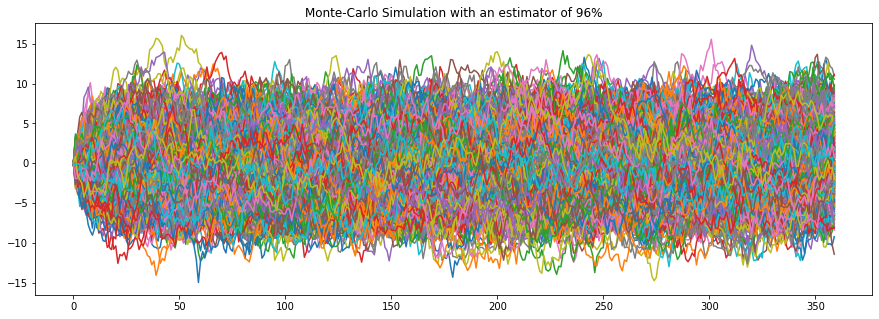

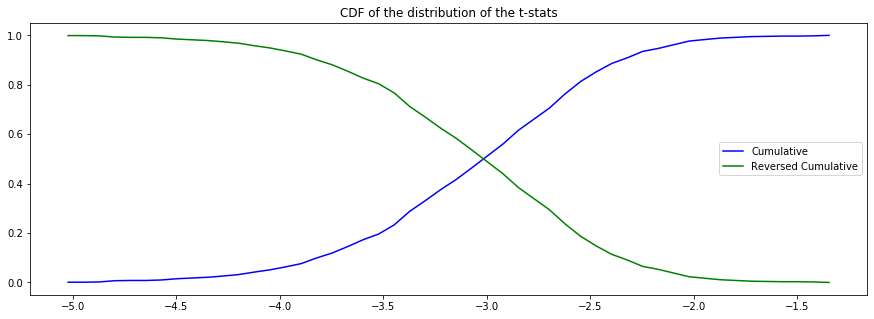

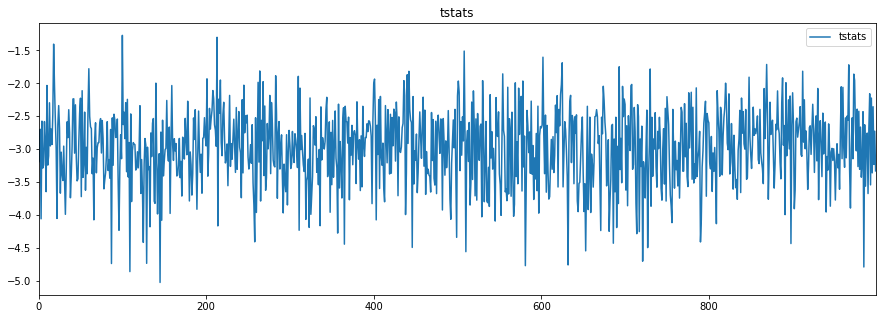

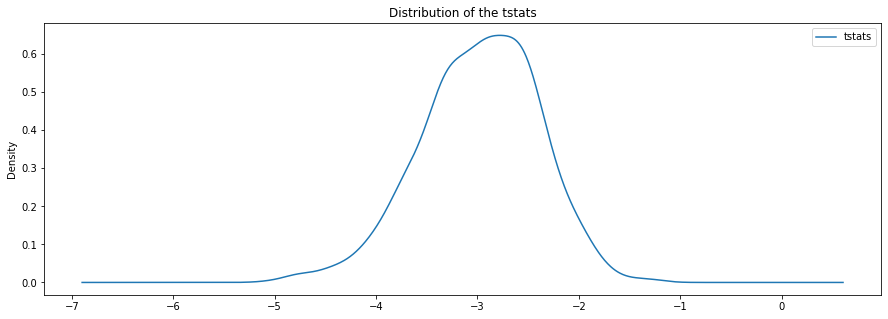

----------------------------------------------------------------------------------------------------
H1    56.0
dtype: float64


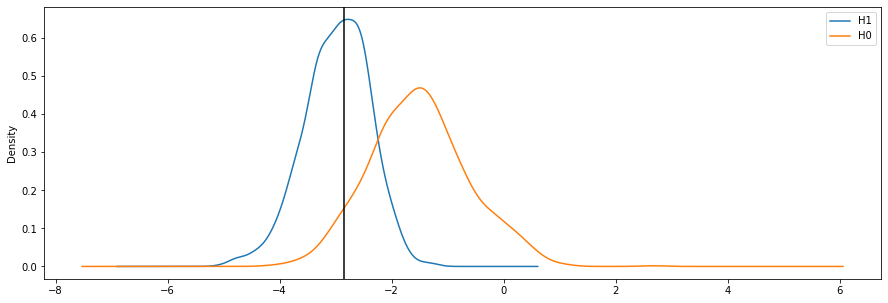

In [15]:
np.random.seed(123)
T=1000
N=360
RS={}
for t in range(T):
    P = np.zeros(N)
    P[0]=0
    for i in range(len(P)-1):
        P[i+1]=0.96*P[i]+np.random.standard_normal(1)
    RS[t] = P
RS=pd.DataFrame(RS)
fig=plt.figure(figsize=(15,5))
plt.plot(RS)
plt.title('Monte-Carlo Simulation with an estimator of 96%')
plt.show()
M=[]
bse_total=[]
std_total=[]
param1=[]
for s in RS:
    Y=RS[[s]].diff().dropna()
    X=RS[[s]].shift(1).dropna()
    X.columns=['Ptminus']
    Y.columns=['Ptdifferencial']
    G=Y.join(X)
    formula ='Ptdifferencial~Ptminus' #we can remove the intercept by adding -1
    results=ols(formula,G).fit()
    tval=results.tvalues[1]
    bse_total.append(results.bse[1])
    std_total.append(X.std())
    param1.append(results.params[1])
    M.append(tval)
M=pd.DataFrame(M)
values, base = np.histogram(M, bins=50)
cumulative = np.cumsum(values)/T
fig=plt.figure(figsize=(15,5))
plt.plot(base[:-1], cumulative, c='blue',label='Cumulative')
plt.plot(base[:-1], 1-cumulative, c='green',label='Reversed Cumulative')
plt.title('CDF of the distribution of the t-stats')
plt.legend()
plt.show()
M.plot(figsize=(15,5))
plt.title('tstats')
plt.legend(['tstats'])
plt.show()
M.plot.kde(figsize=(15,5))
plt.title('Distribution of the tstats')
plt.legend(['tstats'])
plt.show()
print(100*'-')
tB.index=M.index
M.columns=['H1']
tB.columns=['H0']
F=M.join(tB)
F.plot.kde(figsize=(15,5))
plt.axvline(-2.8476,color='black')
print(((M[M<=-2.8476]).dropna().count()/M.count())*100)

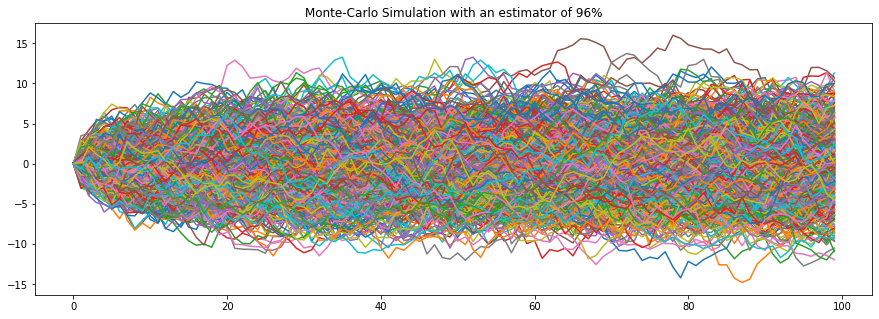

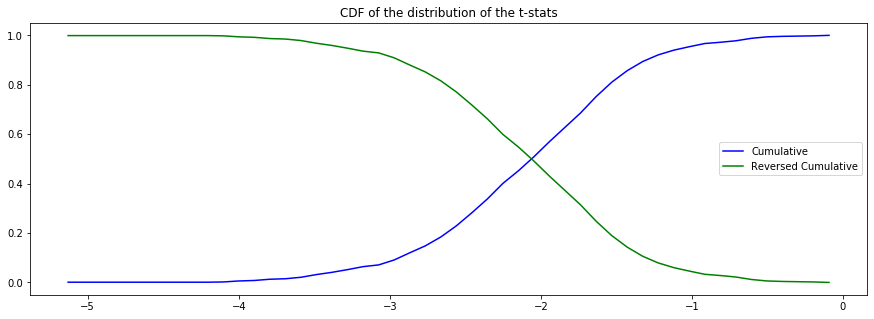

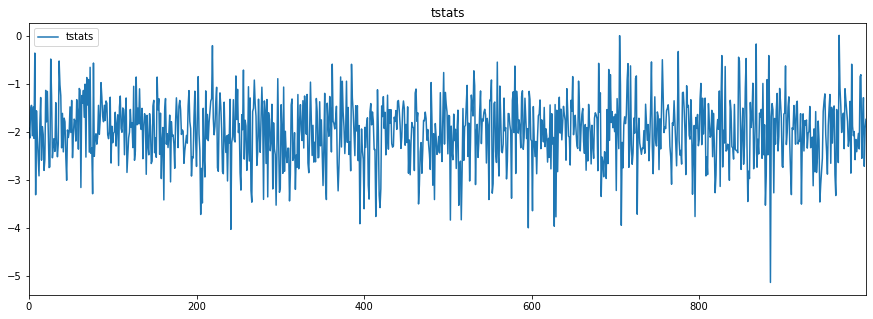

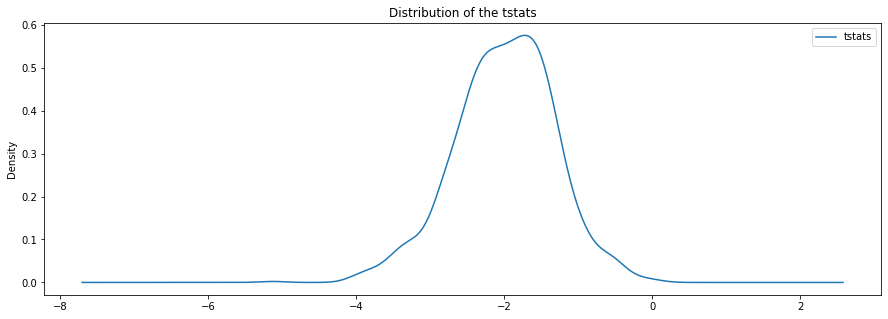

----------------------------------------------------------------------------------------------------
H1    9.7
dtype: float64


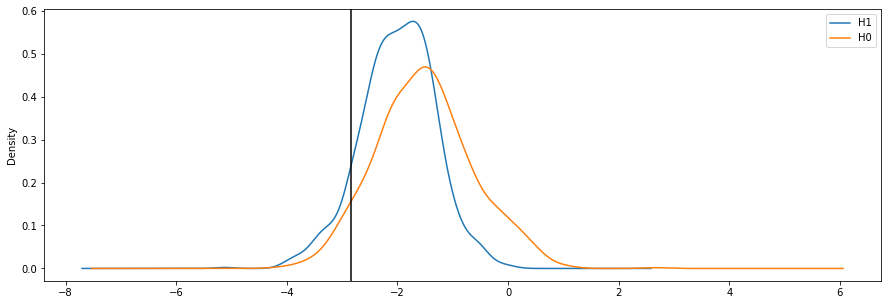

In [18]:
#Try for N=100
np.random.seed(123)
T=1000
N=100
RS={}
for t in range(T):
    P = np.zeros(N)
    P[0]=0
    for i in range(len(P)-1):
        P[i+1]=0.96*P[i]+np.random.standard_normal(1)
    RS[t] = P
RS=pd.DataFrame(RS)
fig=plt.figure(figsize=(15,5))
plt.plot(RS)
plt.title('Monte-Carlo Simulation with an estimator of 96%')
plt.show()
M=[]
bse_total=[]
std_total=[]
param1=[]
for s in RS:
    Y=RS[[s]].diff().dropna()
    X=RS[[s]].shift(1).dropna()
    X.columns=['Ptminus']
    Y.columns=['Ptdifferencial']
    G=Y.join(X)
    formula ='Ptdifferencial~Ptminus' #we can remove the intercept by adding -1
    results=ols(formula,G).fit()
    tval=results.tvalues[1]
    bse_total.append(results.bse[1])
    std_total.append(X.std())
    param1.append(results.params[1])
    M.append(tval)
M=pd.DataFrame(M)
values, base = np.histogram(M, bins=50)
cumulative = np.cumsum(values)/T
fig=plt.figure(figsize=(15,5))
plt.plot(base[:-1], cumulative, c='blue',label='Cumulative')
plt.plot(base[:-1], 1-cumulative, c='green',label='Reversed Cumulative')
plt.title('CDF of the distribution of the t-stats')
plt.legend()
plt.show()
M.plot(figsize=(15,5))
plt.title('tstats')
plt.legend(['tstats'])
plt.show()
M.plot.kde(figsize=(15,5))
plt.title('Distribution of the tstats')
plt.legend(['tstats'])
plt.show()
print(100*'-')
tB.index=M.index
M.columns=['H1']
tB.columns=['H0']
F=M.join(tB)
F.plot.kde(figsize=(15,5))
plt.axvline(-2.8476,color='black')
print(((M[M<=-2.8476]).dropna().count()/M.count())*100)

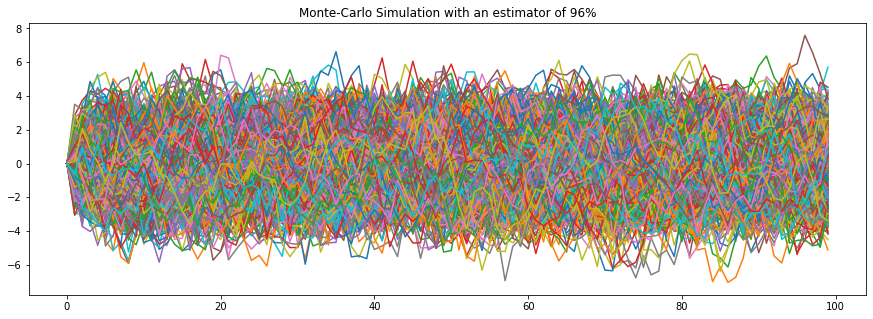

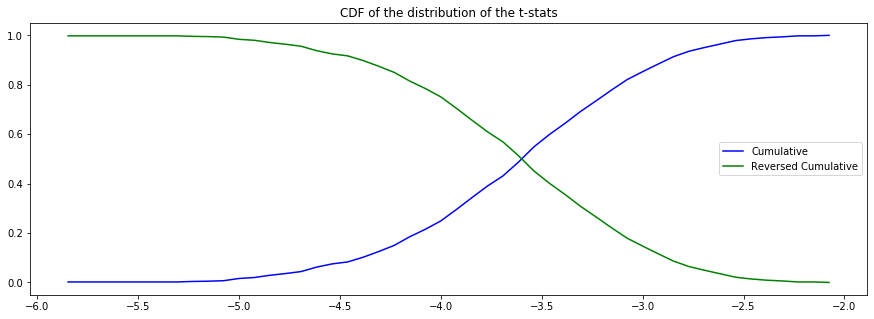

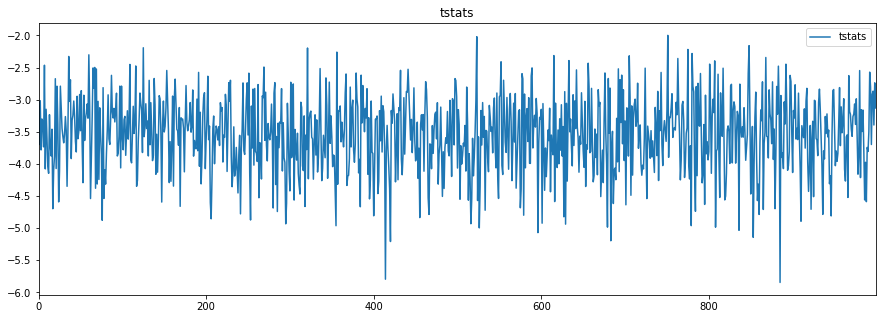

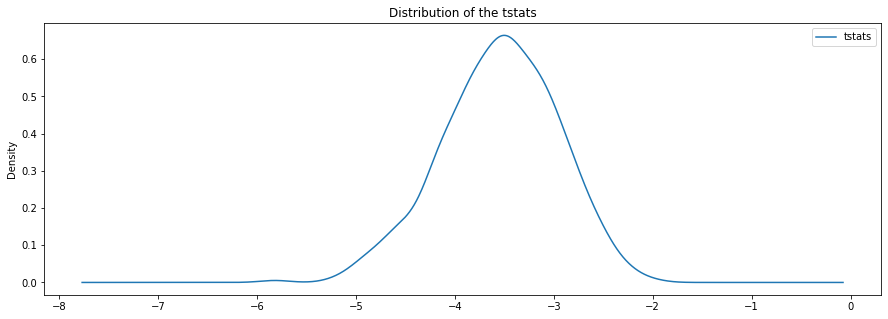

----------------------------------------------------------------------------------------------------
H1    88.3
dtype: float64


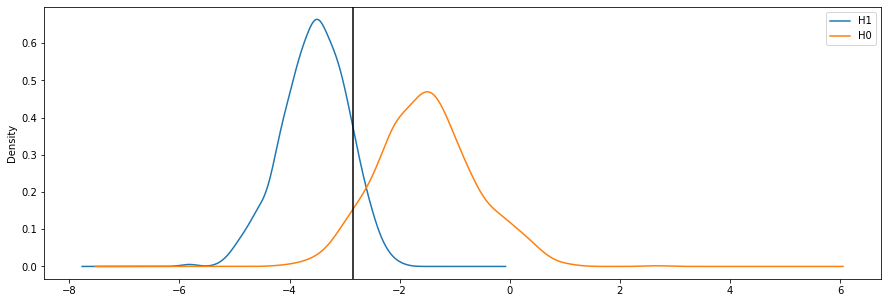

In [19]:
#Try for N=100
np.random.seed(123)
T=1000
N=100
RS={}
for t in range(T):
    P = np.zeros(N)
    P[0]=0
    for i in range(len(P)-1):
        P[i+1]=0.80*P[i]+np.random.standard_normal(1)
    RS[t] = P
RS=pd.DataFrame(RS)
fig=plt.figure(figsize=(15,5))
plt.plot(RS)
plt.title('Monte-Carlo Simulation with an estimator of 96%')
plt.show()
M=[]
bse_total=[]
std_total=[]
param1=[]
for s in RS:
    Y=RS[[s]].diff().dropna()
    X=RS[[s]].shift(1).dropna()
    X.columns=['Ptminus']
    Y.columns=['Ptdifferencial']
    G=Y.join(X)
    formula ='Ptdifferencial~Ptminus' #we can remove the intercept by adding -1
    results=ols(formula,G).fit()
    tval=results.tvalues[1]
    bse_total.append(results.bse[1])
    std_total.append(X.std())
    param1.append(results.params[1])
    M.append(tval)
M=pd.DataFrame(M)
values, base = np.histogram(M, bins=50)
cumulative = np.cumsum(values)/T
fig=plt.figure(figsize=(15,5))
plt.plot(base[:-1], cumulative, c='blue',label='Cumulative')
plt.plot(base[:-1], 1-cumulative, c='green',label='Reversed Cumulative')
plt.title('CDF of the distribution of the t-stats')
plt.legend()
plt.show()
M.plot(figsize=(15,5))
plt.title('tstats')
plt.legend(['tstats'])
plt.show()
M.plot.kde(figsize=(15,5))
plt.title('Distribution of the tstats')
plt.legend(['tstats'])
plt.show()
print(100*'-')
tB.index=M.index
M.columns=['H1']
tB.columns=['H0']
F=M.join(tB)
F.plot.kde(figsize=(15,5))
plt.axvline(-2.8476,color='black')
print(((M[M<=-2.8476]).dropna().count()/M.count())*100)

# Part 3.1

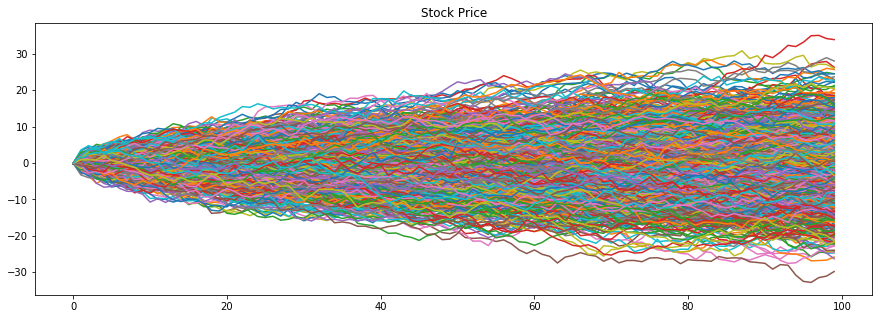

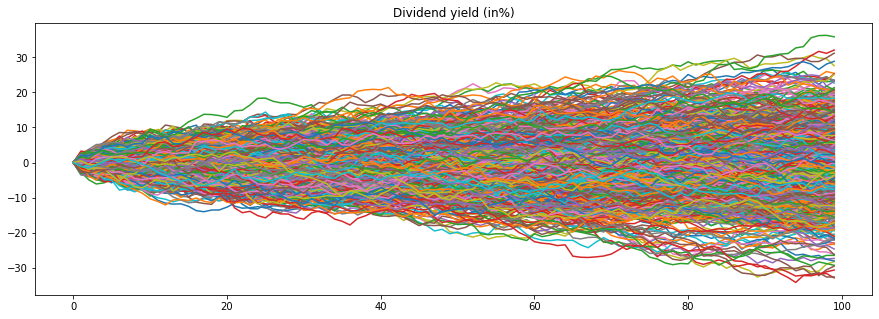

In [20]:
np.random.seed(7565)
V = np.zeros(N+1)
S = np.zeros(N+1)
V={}
S={}
for t in range(T):
    V[t] = np.cumsum(np.random.standard_normal(N))
    S[t] = np.cumsum(np.random.standard_normal(N))
fig = plt.figure(figsize=(15,5))
V=pd.DataFrame(V)
S=pd.DataFrame(S)
V=V-V.iloc[0,:]
S=S-S.iloc[0,:]
V.iloc[0,:]=0
S.iloc[0,:]=0
plt.plot(V)
plt.title('Stock Price')
plt.show()
fig = plt.figure(figsize=(15,5))
plt.plot(S)
plt.title('Dividend yield (in%)')
plt.show()

Stock_price and Dividend_yield are not cointegrated because the Durbin Watson stat :0.17187609421064304<0.38:
----------------------------------------------------------------------------------------------------


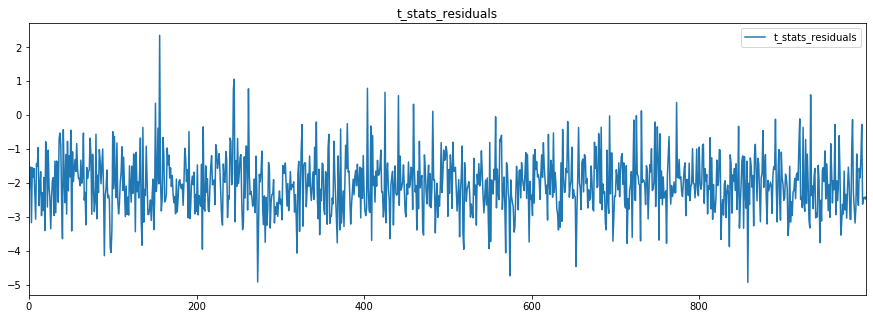

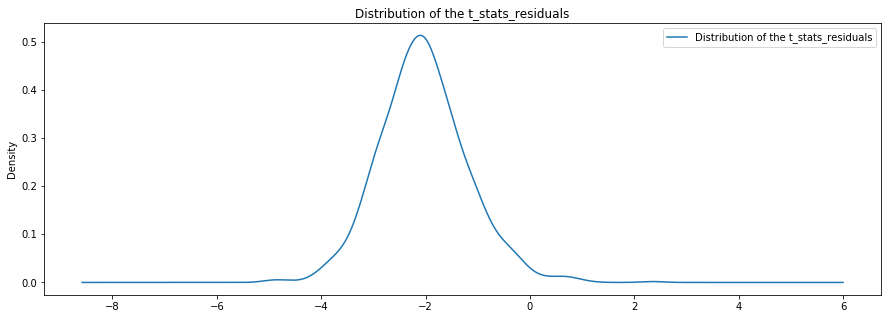

z_t is not stationary with a tstat of -2.0398942345563316
----------------------------------------------------------------------------------------------------


In [21]:
residuals={}
for t in range(T):
    A1=V[[t]]
    A2=(S[[t]]/(100))
    A1.columns=['Stock_price']
    A2.columns=['Dividend_yield']
    Merging=A1.join(A2)
    formula='Stock_price~Dividend_yield'
    results=ols(formula,Merging).fit()
    residuals[t]=results.resid
residuals=pd.DataFrame(residuals)
residualsminus=(residuals.shift(1)).dropna()
#Durbin Watson Test
DW=[]
for t in range(T):
    dw=((residuals[t]-residualsminus[t])**2).sum()/(residuals[t]**2).sum()
    DW.append(dw)
    
dwmean=(np.array(DW)).mean()
if dwmean>0.38:
    print('Stock_price and Dividend_yield are cointegrated because the Durbin Watson stat :{}>0.38:'.format(dwmean))
else:
    print('Stock_price and Dividend_yield are not cointegrated because the Durbin Watson stat :{}<0.38:'.format(dwmean))
print(100*'-') 
#stationarity Test for residuals
t_stats_residuals=[]

for t in range(T):
    A3=(residuals[[t]].diff()).dropna()
    A4=(residuals[[t]].shift(1)).dropna()
    A3.columns=['Differencial']
    A4.columns=['residual_minus']
    Merging_residuals=A3.join(A4)
    formula='Differencial~residual_minus'
    results=ols(formula,Merging_residuals).fit()
    t_stats_residuals.append(results.tvalues[1])
    
t_stats_residuals=np.array(t_stats_residuals)
t_stats_residuals=pd.DataFrame(t_stats_residuals)
t_stats_residuals.columns=['tstats']
t_stats_residuals.plot(figsize=(15,5))
plt.title('t_stats_residuals')
plt.legend(['t_stats_residuals'])
plt.show()
t_stats_residuals.plot.kde(figsize=(15,5))
plt.title('Distribution of the t_stats_residuals')
plt.legend(['Distribution of the t_stats_residuals'])
plt.show()
t_stats_mean=t_stats_residuals.mean()[0]

if t_stats_mean> -2.89:
    print('z_t is not stationary with a tstat of {}'.format(t_stats_mean))
else:
    print('z_t is stationary with a tstat of {}'.format(t_stats_mean))
print(100*'-') 

    


In [22]:
t_stats_residuals=t_stats_residuals.sort_values('tstats')
Critical_values2={}
a=0
b=0
c=0

for t in range(T):
    if (t_stats_residuals.iloc[0:t].count()/T)[0]>0.01 and a==0:
        Critical_values2['1%'] =t_stats_residuals.iloc[t-2][0]
        a+=1
    elif (t_stats_residuals.iloc[0:t].count()/T)[0]>0.05 and b==0:
        Critical_values2['5%'] =t_stats_residuals.iloc[t-2][0]
        b+=1
    elif (tB.iloc[0:t].count()/T)[0]>0.10 and c==0:
        Critical_values2['10%'] =t_stats_residuals.iloc[t-2][0]
        c+=1
print('Critical Values:')
for key, value in Critical_values2.items():
    print('\t%s: %.3f' % (key, value))


Critical Values:
	1%: -3.954
	5%: -3.354
	10%: -3.055


In [23]:
Y=(np.log(df['TOTMKUS(PI)'])).dropna()
X=(np.log(df['TOTMKUS(PI)']*df['TOTMKUS(DY)']/(12*100))).dropna()
Y=pd.DataFrame(Y)
X=pd.DataFrame(X)
X.columns=['Dividend_yield']
Y.columns=['Stock_Price']
G=Y.join(X)
formula='Stock_Price ~ Dividend_yield'
results = ols(formula,G).fit()
print(results.summary())
residuals1=results.resid
residualsminus=(residuals1.shift(1)).dropna()
dw=((residuals1-residualsminus)**2).sum()/((residuals1**2).sum())
print(80*'-')
if dw<0.38:
    print("Price and dividends are not Cointegrated Because the Durbin Watson stat {}<0.38 at an alpha of 5%".format(dw))
else:
    print("Price and dividends are  Cointegrated Because the Durbin Watson stat {}>0.38 at an alpha of 5%".format(dw))

    
    

                            OLS Regression Results                            
Dep. Variable:            Stock_Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     2083.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          2.76e-151
Time:                        12:42:58   Log-Likelihood:                 6.7723
No. Observations:                 360   AIC:                            -9.545
Df Residuals:                     358   BIC:                            -1.772
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.3439      0.018    353.

In [24]:
Y=(np.log(df['TOTMKUK(PI)'])).dropna()
X=(np.log(df['TOTMKUK(PI)']*df['TOTMKUK(DY)']/(12*100))).dropna()
Y=pd.DataFrame(Y)
X=pd.DataFrame(X)
X.columns=['Dividend_yield']
Y.columns=['Stock_Price']
G=Y.join(X)
formula='Stock_Price ~ Dividend_yield'
results = ols(formula,G).fit()
print(results.summary())
residuals2=results.resid
residualsminus=(residuals2.shift(1)).dropna()
dw=((residuals2-residualsminus)**2).sum()/((residuals2**2).sum())
print(80*'-')
if dw<0.38:
    print("Price and dividends are not Cointegrated Because the Durbin Watson stat {}<0.38 at an alpha of 5%".format(dw))
else:
    print("Price and dividends are  Cointegrated Because the Durbin Watson stat {}>0.38 at an alpha of 5%".format(dw))

                            OLS Regression Results                            
Dep. Variable:            Stock_Price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1231.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          6.91e-118
Time:                        12:42:58   Log-Likelihood:                 93.110
No. Observations:                 360   AIC:                            -182.2
Df Residuals:                     358   BIC:                            -174.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6269      0.072     78.

In [25]:
#for US stocks
Y=((residuals1).diff()).dropna()
X=(residuals1.shift(1)).dropna()
Y=pd.DataFrame(Y)
X=pd.DataFrame(X)
X.columns=['Differencial']
Y.columns=['Residualminus']
G=Y.join(X)
formula='Differencial ~ Residualminus'
results = ols(formula,G).fit()
print(results.summary())
print()
print('\t Test on the residuals Time series for US:')
for i in ["10%","5%","1%"]:
    if results.tvalues[1] > Critical_values2[i]:
        print("We fail to reject H0(B=0) whith a t-val of {} using Residuals_tminus- The Time Series is Non-Stationary at an alpha of {}".format(results.tvalues[1],i))
    else:
        print("We reject H0(B=0) whith a t-val of {} using Residuals_tminus- The Time Series is Stationary at an alpha of {}".format(results.tvalues[1],i))

print(80*'-')
#for UK stocks
Y=((residuals2).diff()).dropna()
X=(residuals2.shift(1)).dropna()
Y=pd.DataFrame(Y)
X=pd.DataFrame(X)
X.columns=['Differencial']
Y.columns=['Residualminus']
G=Y.join(X)
formula='Differencial ~ Residualminus'
results = ols(formula,G).fit()
print(results.summary())
print()
print('\t Test on the residuals Time series for UK:')
for i in ["10%","5%","1%"]:
    if results.tvalues[1] > Critical_values2[i]:
        print("We fail to reject H0(B=0) whith a t-val of {} using Residuals_tminus- The Time Series is Non-Stationary at an alpha of {}".format(results.tvalues[1],i))
    else:
        print("We reject H0(B=0) whith a t-val of {} using Residuals_tminus- The Time Series is Stationary at an alpha of {}".format(results.tvalues[1],i))



    

                            OLS Regression Results                            
Dep. Variable:           Differencial   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.114
Date:                Tue, 30 Jun 2020   Prob (F-statistic):             0.0243
Time:                        12:42:58   Log-Likelihood:                 8.8235
No. Observations:                 359   AIC:                            -13.65
Df Residuals:                     357   BIC:                            -5.880
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0009      0.013      0.071

# VECM UK only

In [47]:
#For stocks
Y=(np.log(df['TOTMKUK(PI)']/df['TOTMKUK(PI)'].shift(1))).dropna()
X1=(np.log(df['TOTMKUK(PI)']/df['TOTMKUK(PI)'].shift(1))).shift(1).dropna()
X2=(np.log(df['TOTMKUK(PI)']*df['TOTMKUK(PI)']/(df['TOTMKUK(DY)']*df['TOTMKUK(PI)']).shift(1))).shift(1).dropna()
X3=(residuals2.shift(1)).dropna()
G=pd.DataFrame([Y,X1,X2,X3]).T.dropna()
G.columns=['Pdiff','P_diff_minus','D_diff_minus','R_diff']
formula="Pdiff ~ P_diff_minus+D_diff_minus+R_diff"
results = ols(formula,G).fit()
print(results.summary())
print(100*'-')
if results.params[3]>0:
    print("The sign of y is negative with y={},it doesn't correct the model if significant".format(results.params[3]))
else:
    print('The sign of y is positive with y={},it does correct the model if significant'.format(results.params[3]))
print(100*'-')
print('\t Test on the residuals Time series for UK:')
for i in ["10","5","1"]:
    if results.pvalues[3] < float(i):
        print("y is not significatif for an alpha of {}%".format(i))
    else:
        print("y is significatif for an alpha of {}%".format(i))





                            OLS Regression Results                            
Dep. Variable:                  Pdiff   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.887
Date:                Tue, 30 Jun 2020   Prob (F-statistic):              0.131
Time:                        13:07:23   Log-Likelihood:                 647.59
No. Observations:                 358   AIC:                            -1287.
Df Residuals:                     354   BIC:                            -1272.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0420      0.039      1.082   

In [48]:
#For dividends
Y=(np.log((df['TOTMKUK(DY)']*df['TOTMKUK(PI)'])/(df['TOTMKUK(DY)']*df['TOTMKUK(PI)']).shift(1))).dropna()
X1=(np.log(df['TOTMKUK(PI)']/df['TOTMKUK(PI)'].shift(1))).shift(1).dropna()
X2=(np.log((df['TOTMKUK(PI)']*df['TOTMKUK(PI)'])/(df['TOTMKUK(DY)']*df['TOTMKUK(PI)']).shift(1))).shift(1).dropna()
X3=(residuals2.shift(1)).dropna()
G=pd.DataFrame([Y,X1,X2,X3]).T.dropna()
G.columns=['Ddiff','P_diff_minus','D_diff_minus','R_diff']
formula="Ddiff ~ P_diff_minus+D_diff_minus+R_diff"
results = ols(formula,G).fit()
print(results.summary())
print(100*'-')
if results.params[3]>0:
    print("The sign of y is negative with y={},it doesn't correct the model if significant".format(results.params[3]))
else:
    print('The sign of y is positive with y={},it does correct the model if significant'.format(results.params[3]))
print(100*'-')
print('\t Test on the residuals Time series for UK:')
for i in ["10","5","1"]:
    if results.pvalues[3] < float(i):
        print("y is not significatif- The Time Series is Non-Stationary at an alpha of {}%".format(i))
    else:
        print("y is significatif- The Time Series is Non-Stationary at an alpha of {}%".format(i))






                            OLS Regression Results                            
Dep. Variable:                  Ddiff   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9116
Date:                Tue, 30 Jun 2020   Prob (F-statistic):              0.435
Time:                        13:07:24   Log-Likelihood:                 870.98
No. Observations:                 358   AIC:                            -1734.
Df Residuals:                     354   BIC:                            -1718.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0113      0.021      0.545   